# RFM Analysis

Rfm analysis adalah metode yang digunakan untuk melihat karakteristik dari suatu pelanggan dengan cara membagi kedalam beberapa segement berdasarakan 3 indikator yaitu Recency (berapa lama waktu terakhir kali customer melakukan pembelian ), Frequency (seberapa sering atau seberapa banyak konsumen melakukan pembelian) dan Monetary (seberapa banyak konsumen mengeluarakan uang untuk pembelian)

Hasil dari perhitungan 3 indikator diatas kemudian akan diberikan score dari rentang 1 - 5 dimana score tersebut dinilai berdasarkan ketentuan sebagai berikut: 
* Recency, semakin kecil nilai recency makan scorenya akan semakin tinggi
* Frequency, berbda dengan recency untuk score frequency terbesar di nilai berdasarkan nilai terbesarnya, jadi semakin besar frequencynya maka scorenya akan semakin besar
* Monetary, sama halnya dengan monetary semkin besar nilai monetarynya maka scorenya akan besar.

Dengan demikian tahapan-tahapan analisis RFM adalah sebagai berikut:
* Mengimport data
* Menghitung nilai Recency, Frequency, Monetary
* Memberikan score terhadap ketentuan yang telah disebutkan di atas
* Mmberikan segmentasi pelanggan berdasarkan Jumlah score yang diperoleh
* Membuat Visualisasi bar chart untuk mengetahui lebih jelas propporsi dari masing masing segmen

Segmentasi pelanggan diambil berdasarkan total nilai rfm yang diperoleh dimana nilai tebesarnya yaitu 15 dan terkcilnya 3
* Score 3 - 7 : Hilang
* Score 8 - 11 : Rentan Hilang
* Score 12 - 15 : Loyal

In [1]:
# Mengimnport library
import pandas as pd 
import datetime as dt 
import seaborn as sns
import matplotlib.pyplot as plt

pada tahap awal hal yang pertama dilakukan adalah mengimport library yang dibutuhkan yaitu pandas, datetime, seaborn dan matplotlib, library pandas digunakan untuk mengimport data atau memuat data baik dari file csv maupun jenis file lainnya, datetime digunakan untuk mengatur waktu atau tipe data datetime, dan library seaborn serta matplotlib digunakan untuk membuat visualisasi data

In [2]:
# Load Dataset
dataset = 'Global skincare and Beauty E-commerce.xlsx'
df = pd.read_excel(dataset, sheet_name='data')
df.head()

,Row ID,Order ID,Order Date,Customer ID,Segment,City,State,Country,Country latitude,Country longitude,Region,Market,Subcategory,Category,Product,Quantity,Sales,Discount,Profit
0,46682,IZ-2012-LW699061-40911,2020-01-03,LW-699061,Corporate,Mosul,Ninawa,Iraq,33.223191,43.679291,Western Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,Head & Shoulders Classic Clean Shampoo,20,600,0.0,300.0
1,10124,US-2012-BT1130518-40912,2020-01-04,BT-1130518,Self-Employed,Pilar,Alagoas,Brazil,-14.235004,-51.925280,South America,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Ultra Facial Overnight Hydrating Masque,2,40,0.6,-4.0
2,9067,MX-2012-AW1093031-40912,2020-01-04,AW-1093031,Self-Employed,Santiago de Cuba,Santiago de Cuba,Cuba,21.521757,-77.781167,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Golden Vine Bracelet,1,151,0.0,75.5
3,130,MX-2012-BT1130531-40912,2020-01-04,BT-1130531,Self-Employed,Manzanillo,Granma,Cuba,21.521757,-77.781167,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Crème de Corps Smoothing Oil-to-Foam B...,4,40,0.0,20.0
4,24072,IN-2012-KM1666027-40914,2020-01-06,KM-1666027,Consumer,Huadian,Jilin,China,35.861660,104.195397,Eastern Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,NARS Single Eyeshadow Sophia Cool Brown,1,11,0.0,5.5


dalam tahap ini dilakukan proses pemuatan dataset ke dalam dataframe dengan menggunakan library pandas dengan method `pd.read_excel()`, kemudian setelah itu dilakukan pengecekan dataframe dengan cara menampilkan lima data teratas menggunakan method `df.head()`.

In [3]:
df.columns = df.columns.str.replace(' ','_')

In [4]:
# Membuat RFM Table
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

now = dt.datetime(2024,1,1)

rfm_table = df.groupby('Customer_ID').agg(
    Recency = ('Order_Date', lambda x : (now - x.max()).days),
    Frequency = ('Order_ID','count'),
    Monetary = ('Sales','sum')
)
rfm_table

,Recency,Frequency,Monetary
Customer_ID,,,
AA-10315102,359,6,916
AA-10315120,960,1,63
AA-10315139,150,13,599
AA-103151402,185,6,228
AA-103151404,819,3,218
...,...,...,...
ZD-2192548,751,4,181
ZD-2192564,1410,4,268
ZD-219257,1199,1,124


Kode di atas adalah rangkaian kode untuk melihat nilai dari ketiga indikator yaitu Recency, Frequency dan Monetary. Pertama saya mengubah kolom Order_Date terlebih dahulu menjadi tipe data tanggal agar tidak terjadi error, kemudian setelah itu saya menentukan tanggal terakhir dari dataset sebagai tanggal yang akan dikurangi oleh tanggal terakhir customer berbelanja dan yang terakhir adalah proses perhitungan nilai dari ketiga indikator tersebut menggunakan method Groupby()

In [5]:
# Scoring
rfm_table['R_score'] = pd.qcut(rfm_table['Recency'], 5, labels=[5,4,3,2,1])
rfm_table['F_score'] = pd.qcut(rfm_table['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm_table['M_score'] = pd.qcut(rfm_table['Monetary'].rank(method='first'), 5, labels=[1,2,3,4,5])

rfm_table['total_score'] = rfm_table['R_score'].astype('int') + rfm_table['F_score'].astype('int') + rfm_table['M_score'].astype('int')

Tahapan selanjutnya adalah menentukan score dari hasil perhitungan Recenty, Frequency dan Monetary yaitu dengan ketentuan:
- Nilai Recency kecil maka score akan besar dengan rentang 1 sampai 5,
- Nilai Frequency besar maka score akan besar dengan rentang 1 sampai 5,
- Nilai Monetary besar maka score akan besar dengan rantang 1 sampai 5
  
setelah score diketahui baru dilakukan penjumlahan score dimana untuk jumlah score terkecilnya adalah 3 contoh (r=1, f=1, m= 1 berjumlah 3) sedangkan terbesar adalah 15 (r=5, f=5, m=5 berjumlah 15)

In [6]:
rfm_table

,Recency,Frequency,Monetary,R_score,F_score,M_score,total_score
Customer_ID,,,,,,,
AA-10315102,359,6,916,3,5,5,13
AA-10315120,960,1,63,1,1,2,4
AA-10315139,150,13,599,4,5,5,14
AA-103151402,185,6,228,4,5,3,12
AA-103151404,819,3,218,2,3,3,8
...,...,...,...,...,...,...,...
ZD-2192548,751,4,181,2,5,3,10
ZD-2192564,1410,4,268,1,5,4,10
ZD-219257,1199,1,124,1,2,3,6


In [11]:
rfm_table['Segmentation'] = pd.qcut(rfm_table['total_score'], 3, labels=['Hilang','Berpotensi Hilang', 'Loyal'])

setelah jumlah score diketahui tahapan selanjutnya sekaligus tahapan terakhir yaitu melakukan labeling pada total score yang telah ditentukan di atas berdasarkan sebaran quartile, dimana:
- 3 - 7 = Dikategorikan bahwa customer 'Hilang' atau churn
- 8 - 11 = Dikategorikan bahwa customer 'Berpotensi Hilang' atau perlu diperhatikan
- 12 - 15 = Dikategorikan bahwa customer 'Loyal'

In [14]:
rfm_table.head(10)

,Recency,Frequency,Monetary,R_score,F_score,M_score,total_score,Segmentation
Customer_ID,,,,,,,,
AA-10315102,359,6,916,3,5,5,13,Loyal
AA-10315120,960,1,63,1,1,2,4,Hilang
AA-10315139,150,13,599,4,5,5,14,Loyal
AA-103151402,185,6,228,4,5,3,12,Loyal
AA-103151404,819,3,218,2,3,3,8,Berpotensi Hilang
AA-103151406,1204,2,69,1,2,2,5,Hilang
AA-1031545,14,1,588,5,1,5,11,Berpotensi Hilang
AA-1031548,512,1,76,3,1,2,6,Hilang
AA-1031558,9,2,189,5,2,3,10,Berpotensi Hilang


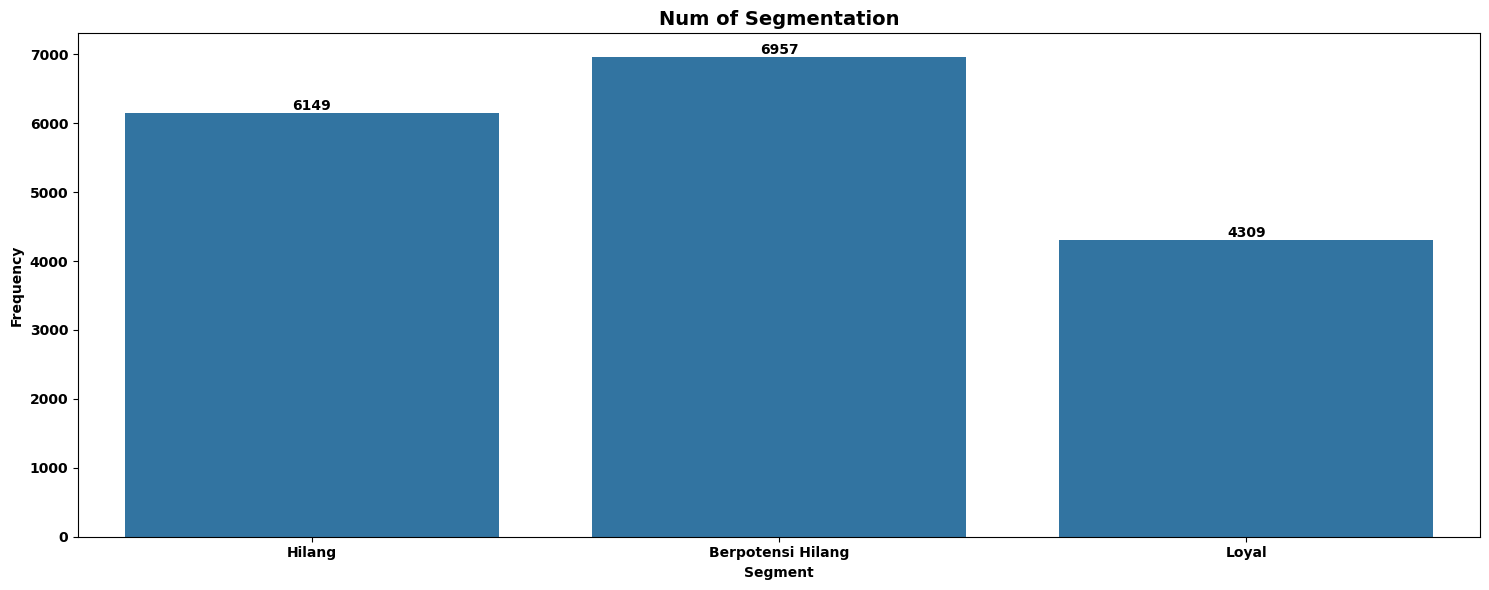

In [16]:
plt.figure(figsize=(15,6))

plt.bar_label((sns.countplot(data=rfm_table, x='Segmentation', stat='count').containers[0]),fontweight='bold')
plt.title('Num of Segmentation', fontweight='bold', fontdict={'fontsize':14})
plt.ylabel('Frequency', fontweight='bold')
plt.xlabel('Segment',fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show();

Grafik di atas menunjukan bahwa kategori pelanggan 'Berpotensi Hilang' dan 'Hilang' sangat lumayan banyak dengan jumlah masing-masing 6.957 dan 6.194 pelanggan sedangkan pelanggan loyal hanya berjumlah 4.309 pelanggan, hal tersebut bisa menjadi warning atau perhatian bagi pemanggku kepentingan bisnis dimana tingkat potensi churn lebih tinggi dibandingkan pelanggan yang stay atau setia sehingga perlu kebijakan-kebijakan yang perlu dilakukan terhadap customer tersebut misalnya dengan campaign yang menarik atau memberikan promo kepada customer yang churn

C:\Users\e5140\AppData\Local\Temp\ipykernel_7720\304813397.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size = rfm_table.groupby('Segmentation')['Segmentation'].count()


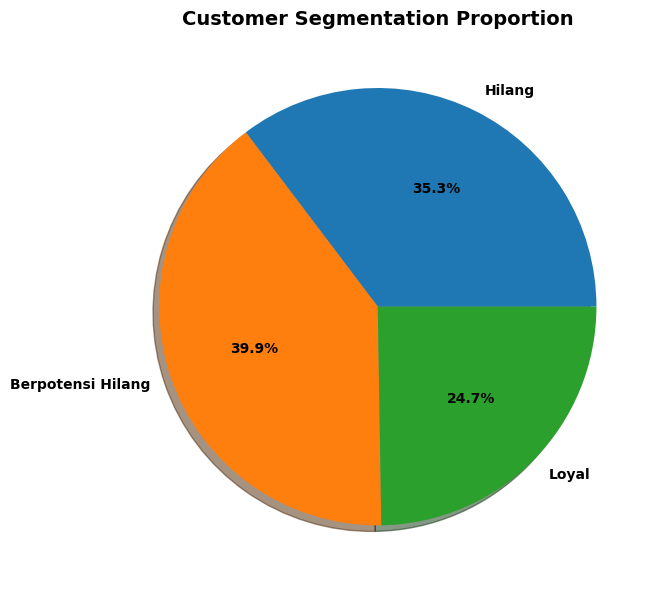

In [18]:
plt.figure(figsize=(10,6))

labels = rfm_table['Segmentation'].sort_values(ascending=True).unique()
size = rfm_table.groupby('Segmentation')['Segmentation'].count()

plt.pie(x=size, labels=labels, autopct='%1.1f%%', shadow=True, labeldistance=1.1,textprops={'fontweight':'bold', 'fontsize':10}, normalize=True, )
plt.title('Customer Segmentation Proportion', fontweight='bold', fontdict={'fontsize':14})
plt.tight_layout()
plt.show()

Begitu pula jika dilihat berdasarkan persentasenya kategory pelanggan 'Berpotensi Hilang' memiliki persentase paling tinggi sebesar 39.9% disusul pelanggan 'Hilang' dengan persentase 35.3% dari jumlah pelanggan, kemudian 24.7% untuk kategori pelanggan 'Loyal'.